In [ ]:
import pandas as pd
import numpy as np
import ast
import re
2
movies = pd.read_csv(r'D:\Python\DULIEU\tmdb_5000_movies.csv')
credits = pd.read_csv(r'D:\Python\DULIEU\tmdb_5000_credits.csv')


In [2]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movies = movies[['id', 'title', 'genres', 'keywords', 'overview']]


In [4]:
movies.head(5)

,id,title,genres,keywords,overview
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca..."


In [5]:
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies = movies.merge(credits, left_on='id', right_on='movie_id')

In [7]:
print(movies.columns)

Index(['id', 'title_x', 'genres', 'keywords', 'overview', 'movie_id',
       'title_y', 'cast', 'crew'],
      dtype='object')


In [8]:
movies.head(5)

,id,title_x,genres,keywords,overview,movie_id,title_y,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:


def extract_genres(text):
    try:
        genres_list = ast.literal_eval(text)  
        genres = [genre['name'].replace(" ", "") for genre in genres_list]  
        return " ".join(genres)
    except:
        return ""

def extract_keywords(text):
    try:
        keywords_list = ast.literal_eval(text)
        keywords = [keyword['name'].replace(" ", "") for keyword in keywords_list]
        return " ".join(keywords)
    except:
        return ""

def extract_cast(text):
    try:
        cast_list = ast.literal_eval(text)
        cast_names = [cast['name'].replace(" ", "") for cast in cast_list[:3]]  
        return " ".join(cast_names)
    except:
        return ""

def extract_director(text):
    try:
        crew_list = ast.literal_eval(text)
        directors = [member['name'].replace(" ", "") for member in crew_list if member['job'] == 'Director']
        return " ".join(directors)
    except:
        return ""

movies['genres_ok'] = movies['genres'].apply(extract_genres)
movies['keywords_ok'] = movies['keywords'].apply(extract_keywords)
movies['cast_ok'] = movies['cast'].apply(extract_cast)
movies['director_ok'] = movies['crew'].apply(extract_director)




In [11]:
movies.rename(columns={'title_x': 'title'}, inplace=True)


In [ ]:

movies['content'] = movies['genres_ok'] + " " + movies['keywords_ok'] + " " + movies['cast_ok'] + " " + movies['director_ok'] + " " + movies['overview']

movies[['title', 'content']].head()

,title,content
0,Avatar,Action Adventure Fantasy ScienceFiction cultur...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drugabuse exoti...
2,Spectre,Action Adventure Crime spy basedonnovel secret...
3,The Dark Knight Rises,Action Crime Drama Thriller dccomics crimefigh...
4,John Carter,Action Adventure ScienceFiction basedonnovel m...


In [15]:
movies['content'] = movies['content'].fillna('')

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(movies['content'])  

print("TF-IDF matrix shape:", tfidf_matrix.shape)

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()



TF-IDF matrix shape: (4803, 35547)


In [ ]:
def recommend(title, cosine_sim=cosine_sim):
   
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]

    return movies['title'].iloc[movie_indices]

In [20]:
print(recommend('The Dark Knight Rises'))

65                              The Dark Knight
428                              Batman Returns
119                               Batman Begins
299                              Batman Forever
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
210                              Batman & Robin
9            Batman v Superman: Dawn of Justice
2507                                  Slow Burn
3819                                   Defendor
Name: title, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['content'])


def search_by_topic(query, tfidf=tfidf, tfidf_matrix=tfidf_matrix):
    query_vec = tfidf.transform([query])
    cosine_sim_query = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_indices = cosine_sim_query.argsort()[-5:][::-1]
    return movies['title'].iloc[top_indices].tolist()


In [22]:
print(search_by_topic("love"))

['Love Letters', 'Two Girls and a Guy', 'Vamps', 'Juliet and Alfa Romeo', 'Her']


In [43]:
movies.to_csv("movies_ok.csv", index=False)


In [23]:
import matplotlib.pyplot as plt

def recommend_with_plot(title):
    if title not in indices:
        print("Phim không tồn tại.")
        return []

    idx = indices[title]
    cosine_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    sim_scores = list(enumerate(cosine_sim))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    top_scores = sim_scores[1:6]
    top_indices = [i[0] for i in top_scores]
    recommended_titles = movies['title'].iloc[top_indices].tolist()
    scores = [i[1] for i in top_scores]

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 5))
    plt.barh(recommended_titles[::-1], scores[::-1], color='skyblue')
    plt.xlabel('Độ tương đồng')
    plt.title(f'Top 5 phim giống với "{title}"')
    plt.tight_layout()
    plt.show()

    return recommended_titles


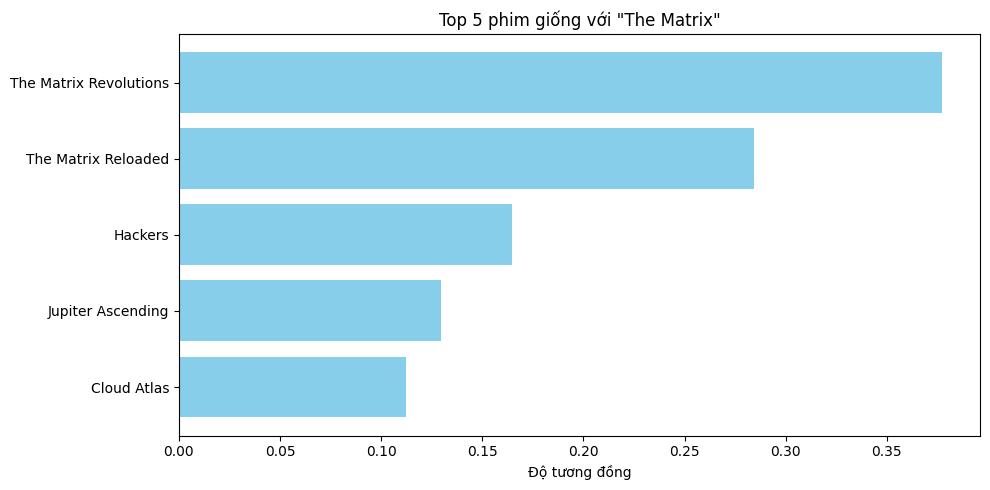

['The Matrix Revolutions',
 'The Matrix Reloaded',
 'Hackers',
 'Jupiter Ascending',
 'Cloud Atlas']

In [47]:
recommend_with_plot("The Matrix")


In [24]:
import joblib
print("Lưu các file kết quả...")
movies.to_csv(r'D:\Python\DULIEU\movies_ok.csv', index=False)
joblib.dump(tfidf_matrix, r'D:\Python\DULIEU\tfidf_matrix.pkl')
joblib.dump(cosine_sim, r'D:\Python\DULIEU\cosine_sim.pkl')
joblib.dump(tfidf, r'D:\Python\DULIEU\tfidf_vectorizer.pkl')
joblib.dump(indices, r'D:\Python\DULIEU\indices.pkl')
print("Đã lưu: movies_ok.csv, tfidf_matrix.pkl, cosine_sim.pkl, tfidf_vectorizer.pkl, indices.pkl")

Lưu các file kết quả...
Đã lưu: movies_ok.csv, tfidf_matrix.pkl, cosine_sim.pkl, tfidf_vectorizer.pkl, indices.pkl
